In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.0 MB/s eta 0:00:00a 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [7]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import seaborn as sns

In [9]:
df = pd.read_csv("wine.csv")

In [10]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,good
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [13]:
x = df.drop("quality",axis=1)
y = df["quality"]

In [21]:
x_train,x_temp,y_train,y_temp = train_test_split(x,y,test_size=0.3,random_state=42)
x_val,x_test,y_val,y_test = train_test_split(x_temp,y_temp,test_size=0.5,random_state=42)

In [15]:
from sklearn.preprocessing import StandardScaler

In [16]:
scaler = StandardScaler()

In [22]:
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
x_val_scaled = scaler.transform(x_val)


In [31]:
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=x_train.shape[1]))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 64)                768       
                                                                 
 dense_5 (Dense)             (None, 32)                2080      
                                                                 
 dense_6 (Dense)             (None, 1)                 33        
                                                                 
Total params: 2881 (11.25 KB)
Trainable params: 2881 (11.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [49]:
callbacks = EarlyStopping(monitor = "val_loss",
                         min_delta=0.00001,
                         patience = 10,
                         verbose=1,
                         mode="auto",
                         baseline=None,
                         restore_best_weights=False)

In [66]:
# Assuming 'good' is mapped to 1 and 'bad' is mapped to 0
y_train = y_train.map({'good': 1, 'bad': 0})
y_val = y_val.map({'good': 1, 'bad': 0})
y_test = y_test.map({"good":1,"bad":0})


In [58]:
history = model.fit(x_train_scaled,y_train,epochs=20,callbacks=callbacks,validation_data=(x_val_scaled,y_val))

Epoch 1/20
35/35 [==============================] - 1s 10ms/step - loss: 0.6454 - accuracy: 0.6291 - val_loss: 0.6006 - val_accuracy: 0.6958
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5513 - accuracy: 0.7408 - val_loss: 0.5747 - val_accuracy: 0.6792
Epoch 3/20
35/35 [==============================] - 0s 4ms/step - loss: 0.5183 - accuracy: 0.7498 - val_loss: 0.5730 - val_accuracy: 0.6708
Epoch 4/20
35/35 [==============================] - 0s 3ms/step - loss: 0.5043 - accuracy: 0.7578 - val_loss: 0.5644 - val_accuracy: 0.6958
Epoch 5/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4960 - accuracy: 0.7641 - val_loss: 0.5663 - val_accuracy: 0.6875
Epoch 6/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4897 - accuracy: 0.7632 - val_loss: 0.5585 - val_accuracy: 0.7167
Epoch 7/20
35/35 [==============================] - 0s 3ms/step - loss: 0.4840 - accuracy: 0.7739 - val_loss: 0.5618 - val_accuracy: 0.7000
Epoch 8/20
35/35 [=

In [60]:
history_df = pd.DataFrame(history.history)

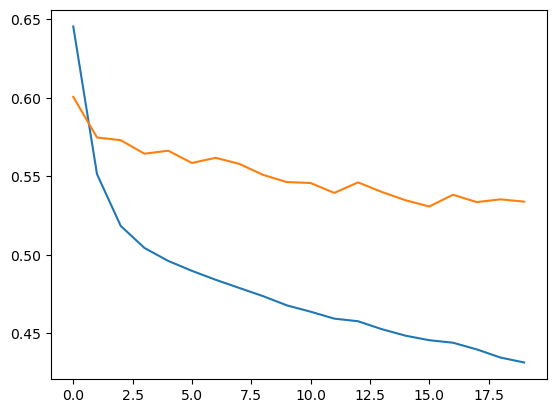

In [62]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

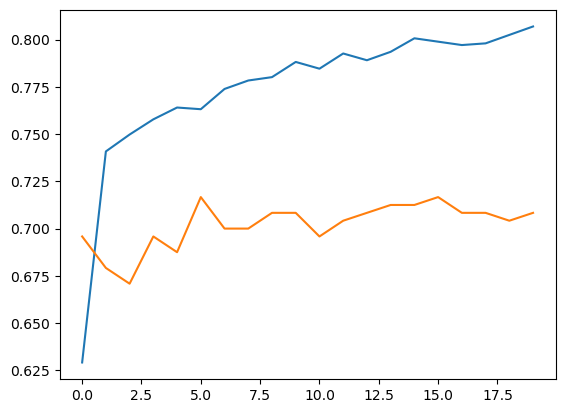

In [63]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])

In [67]:
test_loss, test_accuracy = model.evaluate(x_test_scaled, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

8/8 [==============================] - 0s 2ms/step - loss: 0.4530 - accuracy: 0.7750
Test Loss: 0.4530266523361206
Test Accuracy: 0.7749999761581421


In [ ]:
test_loss,test_accuracy = model.evaluate(x_test_scaled,y_test)
print("Test loss",test_loss)
print("Test accuracy")